<a href="https://colab.research.google.com/github/Anny8910/Amazon-review-sentiment-analysis/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print('The number of entries in the data frame: ', df.shape[0])

The number of entries in the data frame:  568454


In [ ]:
df['ProductId'].nunique()

74258

In [ ]:
df['UserId'].nunique()

256059

In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df = df[df['Score'] != 3]

In [ ]:
df['Positivity'] = np.where(df['Score'] > 3, 1, 0)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


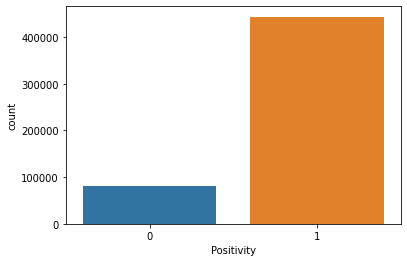

In [ ]:
sns.countplot(df['Positivity'])
plt.show()

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525773 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      525773 non-null  int64 
 1   ProductId               525773 non-null  object
 2   UserId                  525773 non-null  object
 3   ProfileName             525773 non-null  object
 4   HelpfulnessNumerator    525773 non-null  int64 
 5   HelpfulnessDenominator  525773 non-null  int64 
 6   Score                   525773 non-null  int64 
 7   Time                    525773 non-null  int64 
 8   Summary                 525773 non-null  object
 9   Text                    525773 non-null  object
 10  Positivity              525773 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 436.8 MB


In [ ]:
df = df.drop(['ProductId','UserId','ProfileName','Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'], axis=1)


In [ ]:
# checking the memory usag
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525773 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        525773 non-null  object
 1   Positivity  525773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 271.9 MB


In [ ]:
# split the data into training and testing data

# text will be used for training
# positivity is what we are predicting
x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Positivity'], random_state = 0)

In [ ]:
print('x_train first entry: \n\n', x_train[0])
print('\n\nx_train shape: ', x_train.shape)
      

x_train first entry: 

 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


x_train shape:  (394329,)


In [ ]:
vect = CountVectorizer().fit(x_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
feat = vect.get_feature_names()

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

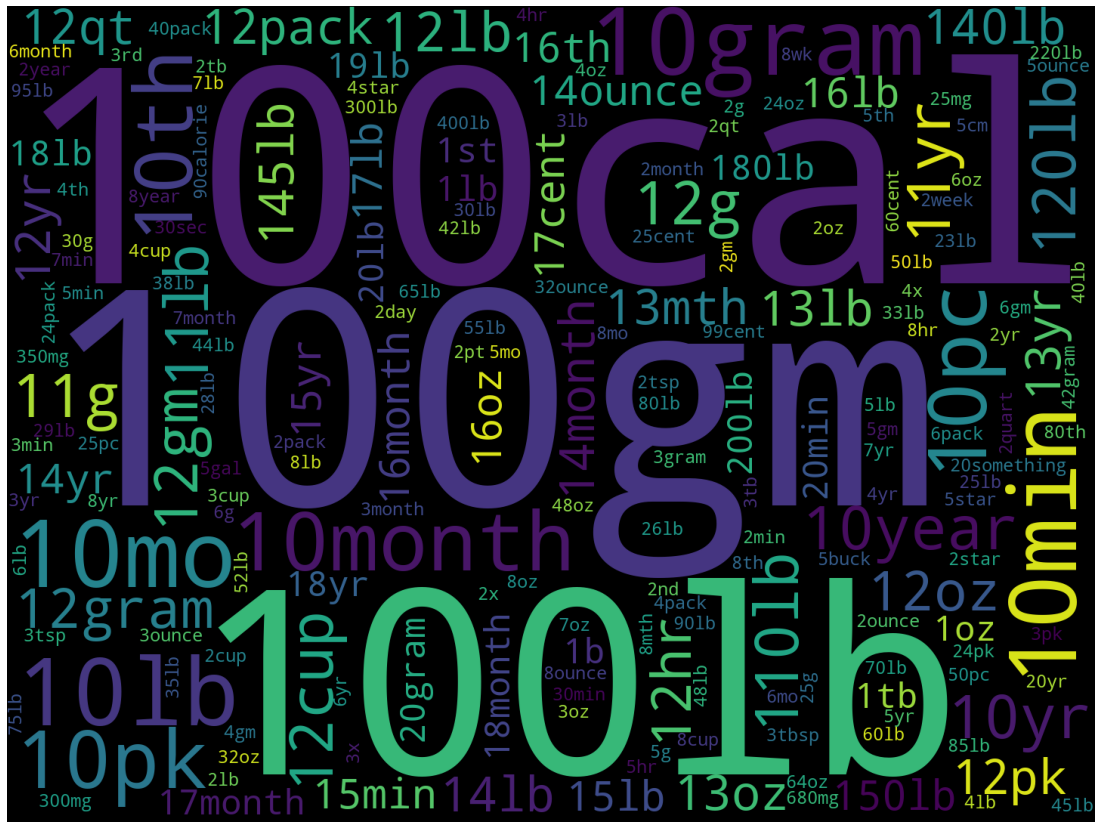

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
len(vect.get_feature_names())

102135

In [ ]:
x_train_vectorized = vect.transform(x_train)

In [ ]:
model = LogisticRegression()
model.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(vect.transform(x_test))

In [ ]:
accuracy_score(y_test, predictions)

0.9370834728097136

In [ ]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.8520676334776257


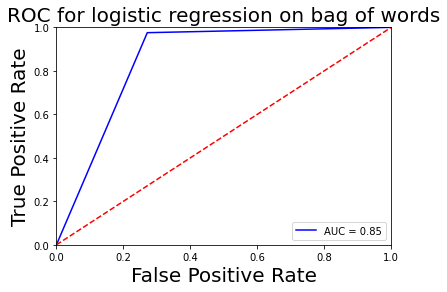

In [ ]:
plt.title('ROC for logistic regression on bag of words', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [ ]:
# coefficient determines the weight of a word (positivity or negativity)
# checking the top 10 positive and negative words

# getting the feature names
feature_names = np.array(vect.get_feature_names())

# argsort: Integer indicies that would sort the index if used as an indexer
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['disappointing' 'worst' 'disappointment' 'yuck' 'tasteless' 'sounded'
 'hopes' 'ruined' 'concept' 'deceptive']

Largest Coefs: 
['hooked' 'pleasantly' 'beat' 'skeptical' 'worried' 'delicious'
 'refreshing' 'favorites' 'satisfied' 'addicted']



In [ ]:
# ignore terms that appear in less than 5 documents
vect = TfidfVectorizer(min_df = 5).fit(x_train)
len(vect.get_feature_names())

35289

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

In [ ]:
feat = vect.get_feature_names()

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

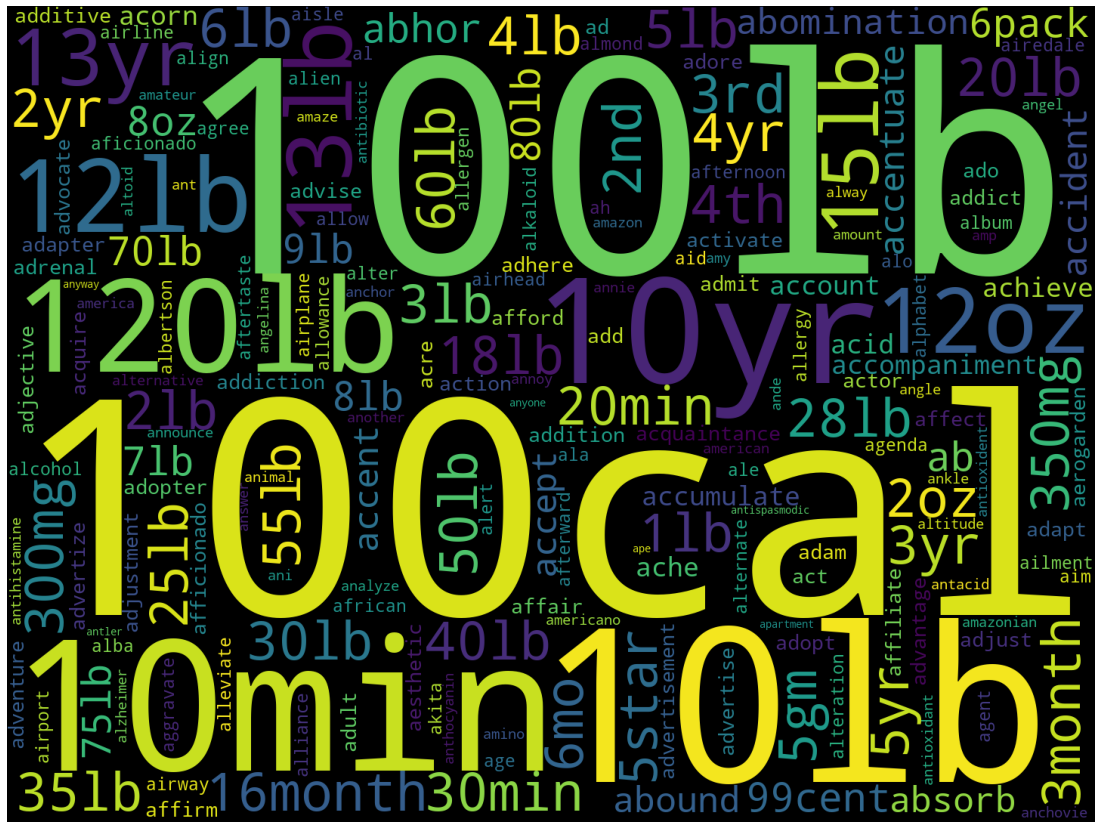

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
x_train_vectorized = vect.transform(x_train)

In [ ]:
model = LogisticRegression()
model.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(vect.transform(x_test))

In [ ]:
accuracy_score(y_test, predictions)

0.939388636986093

In [ ]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.8511620421199818


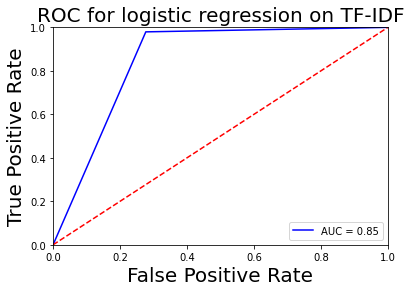

In [ ]:
plt.title('ROC for logistic regression on TF-IDF', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [ ]:
# even though we reduced the number of features considerably
# the AUC did not change much

# let us test our model
new_review = ['The food was delicious', 'The food was not good']

print(model.predict(vect.transform(new_review)))

[1 1]


In [ ]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(x_train)
x_train_vectorized = vect.transform(x_train)
len(vect.get_feature_names())

528082

In [ ]:
feat = vect.get_feature_names()

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

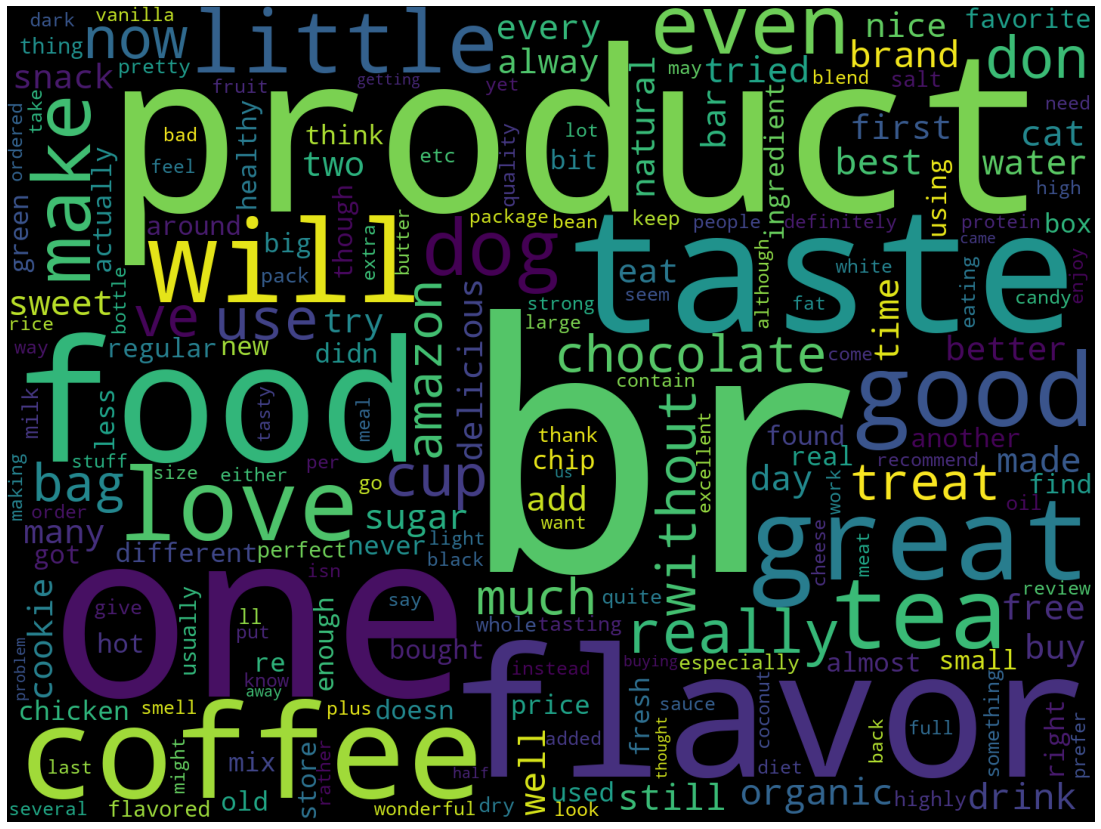

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [ ]:
# the number of features has increased again
# checking for the AUC
model = LogisticRegression()
model.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(vect.transform(x_test))

In [ ]:
accuracy_score(y_test, predictions)

0.9651410486595052

In [ ]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.9239998941369875


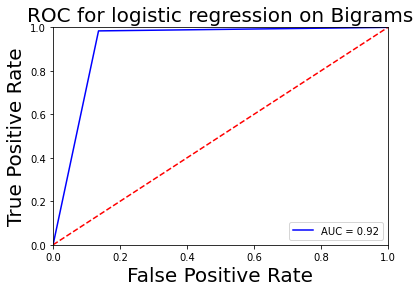

In [ ]:
plt.title('ROC for logistic regression on Bigrams', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()


In [ ]:
# check the top 10 features for positive and negative
# reviews again, the AUC has improved
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

# print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
# print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

In [ ]:
new_review = ['The food is really good, I am happy with it.']
print(model.predict(vect.transform(new_review)))

[1]


In [ ]:
new_review = [' I am disappointed with this food ']
print(model.predict(vect.transform(new_review)))

[0]


In [ ]:
new_review = ['I would feel sad for anyone eating here']
print(model.predict(vect.transform(new_review)))

[1]


In [ ]:
# there are still more misclassifications
# lets try with 3 grams
vect = CountVectorizer(min_df = 5, ngram_range = (1,3)).fit(x_train)
x_train_vectorized = vect.transform(x_train)
len(vect.get_feature_names())

1493477

In [ ]:
feat = vect.get_feature_names()

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

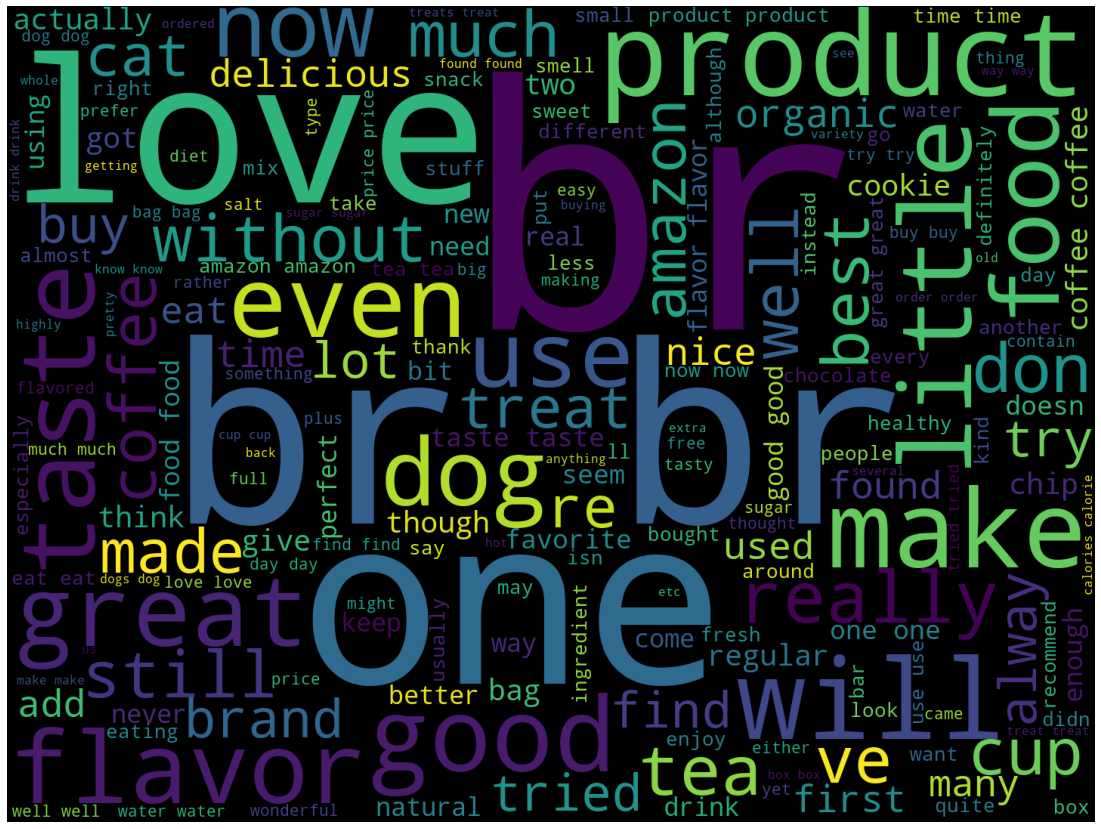

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(x_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(vect.transform(x_test))
accuracy_score(y_test, predictions)

0.9693253400687746

In [ ]:
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.9335492888257535


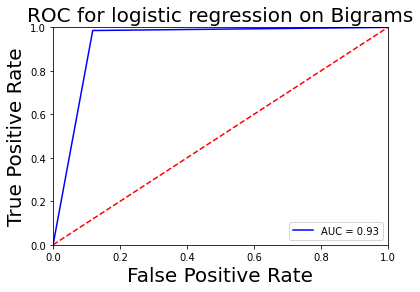

In [ ]:
plt.title('ROC for logistic regression on Bigrams', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [ ]:
# check the top 10 features for positive and negative
# reviews again, the AUC has improved
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['two stars' 'disappointment' 'yuck' 'not worth' 'disappointing'
 'not good' 'tasteless' 'awful' 'not recommend' 'terrible']

Largest Coef: 
['hooked' 'be disappointed' 'not disappointed' 'excellent' 'not bitter'
 'delicious' 'you will not' 'not bad' 'just right' 'skeptical']



In [ ]:
new_review = ['The food is really delicious.']
print(model.predict(vect.transform(new_review)))

[1]


In [ ]:
new_review = ['The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again']
print(model.predict(vect.transform(new_review)))


[0]
